# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Advertising.csv',index_col=0)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Пропуски отсутствуют

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
X = df[['TV','radio','newspaper']]
#y = df[['sales']]
#y = df['sales']
X = X.values
#y = y.values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
#y = y.reshape(-1, 1) # необходим вектор
print(X.shape)

(200, 4)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

Tеоритические выкладки:

https://adeveloperdiary.com/machine%20learning/algorithm/introduction-to-coordinate-descent-using-least-squares-regression/

In [6]:
y = df['sales']
y = y.values
w = np.zeros((X.shape[1]))  # выбрали начальные коэффициенты равные 0
num_iters = 100  # количество итераций

for iteration in range(num_iters):
    # вектор разницы между реальным и предсказанным значением на 0 итерации
    r = y - (X @ w)

    for j in range(len(w)):
        # вектор разницы между реальным и предсказанным значением на 0 итерации без wj
        r = r + (X[:, j] * w[j])
        w[j] = X[:, j] @ r  # предсказание wj
        # разница между реальным и предсказанным значением c обновленным wj
        r = r - (X[:, j] * w[j])

print(w)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


2- способ . Вычисление с помощью матриц-столбцов

In [7]:
y = df[['sales']]
y = y.values
w = np.zeros((X.shape[1], 1))  # выбрали начальные коэффициенты равные 0

num_iters = 100  # количество итераций


for iteration in range(num_iters):
    # вектор разницы между реальным и предсказанным значением на 0 итерации
    r = y - (X @ w)
    
    for j in range(len(w)):
        # вектор разницы между реальным и предсказанным значением на 0 итерации без wj
        r = r + (X[:, [j]] * w[[j]])
        w[[j]] = X[:, [j]].T @ r  # предсказание wj
        # разница между реальным и предсказанным значением c обновленным wj
        r = r - (X[:, [j]] * w[[j]])
    # print(w)
    # break

print(w[:,0])

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


3- й способ: Если нормализация другим методом

In [8]:
X = df[['TV','radio','newspaper']]
X = X.values

X = (X - np.mean(X, axis=0))/np.std(X, axis=0) # стандартизация
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X]) # добавление столбца из единиц

In [9]:
y = df[['sales']]
y = y.values
w = np.zeros((X.shape[1], 1))  # выбрали начальные коэффициенты равные 0

num_iters = 100  # количество итераций


for _ in range(num_iters):
    # вектор разницы между реальным и предсказанным значением на _ итерации
    r = y - (X @ w)
    
    for j in range(len(w)):
        # вектор разницы между реальным и предсказанным значением на 0 итерации без wj
        r = r + (X[:, [j]] * w[[j]])
        w[[j]] = (X[:, [j]].T @ r ) / ((X[:, [j]].T) @ X[:, [j]]) # предсказание wj
        # разница между реальным и предсказанным значением c обновленным wj
        r = r - (X[:, [j]] * w[[j]])
    # print(w)
    # break

print(w[:,0])



[14.0225      3.91925365  2.79206274 -0.02253861]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [10]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)

model.fit(X, y)
 
print(model.coef_)
print(model.score(X, y))

[[14.0225      3.91925365  2.79206274 -0.02253861]]
0.8972106381789522


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [11]:
# Исходные данные согласно условию задачи 
X = df[['TV','radio','newspaper']]
y = df[['sales']]
X = X.values
y = y.values

In [12]:
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

**Добавим единичный столбец**

In [13]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [14]:
def mse_error(y, y_pred): 
    # вектор mse_error
    v_mse = sum((y - y_pred)**2)/y.shape[0]    
    return v_mse[0]

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [15]:
print(f'Средняя квадратичная ошибка, если прогноз среднее значение \nMSE = {mse_error(y, np.mean(y))}')

Средняя квадратичная ошибка, если прогноз среднее значение 
MSE = 27.085743749999985


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [16]:
def lin_pred(X, w):
    return np.dot(X, w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [17]:
def stoch_grad_step(X, y, w, indexes, eta=0.01):  
    Xs = X[indexes]
    ys = y[indexes]
   
    errors = ys - (Xs @ w)
    grad = -Xs.T@errors
    w = w - eta*grad
    return w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [18]:
def stochastic_gradient_descent(X, y, w,
                                eta=1e-3, 
                                max_iter:int = 1000,
                                min_weight_dist=1e-8,
                                batch_size: int = 1,
                                random_state = None):
    """Реализация стохастического(мини-пакетного) градиентного спуска 

    Args:
        X (ndarray): массив Х
        y (ndarray): вектор-массив y
        w (ndarray): вектор-массив w
        eta (float, optional): _начальное и постоянное значение 
                                темпа обучения. Defaults to 1e-3.
        max_iter (int, optional): количество итераций. Defaults to 1000.
        min_weight_dist (float, optional): min расстояние между векторами весов. Defaults to 1e-8.
        batch_size (int, optional): размер пакета(при мини-пакетном градиентный спуске). 
                                    Defaults to 1(стохастический градиентный спуск).
        random_state (int, optional): воспроизводимость случайных значений. Defaults to None.

    Returns:
        ndarray, list: вектор w, список ошибок каждой итерации
    """
    
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # для воспроизводимости последовательности псевдослучайных чисел используем seed.
    if random_state:    
        np.random.seed(random_state)
    
   

    # Основной цикл
    for _ in range(max_iter):
       
        # случайной индекс объекта обучающей выборки
        indexes = np.random.randint(0, len(X), batch_size)
        prev_w = w
        w = stoch_grad_step(X, y, w, indexes, eta) # предсказанный вектор
        weight_dist = np.linalg.norm(w - prev_w)  # евклидово расстояние м/у соседними w
        
        errors.append(mse_error(y, (X @ w))) 
        
        if weight_dist < min_weight_dist: # условие точности алгоритма
            break
        
    return w, errors


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [19]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros((4, 1)), 
                                                                            max_iter=10**5,
                                                                            batch_size = 1,
                                                                            random_state = 42
                                                                            )
len(stoch_errors_by_iter)


CPU times: total: 32.2 s
Wall time: 32.4 s


100000

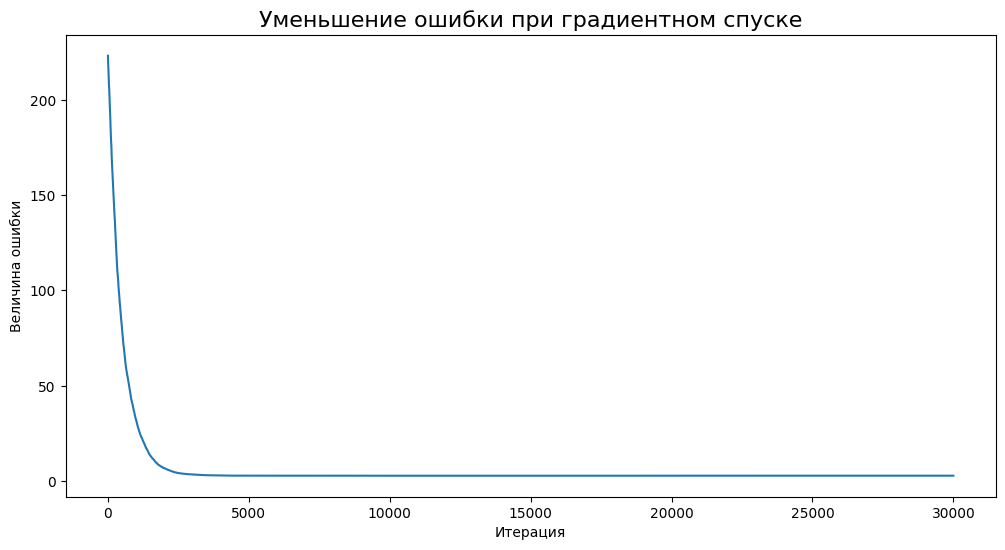

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(x=range(len(stoch_errors_by_iter[:30000])), 
                        y=stoch_errors_by_iter[:30000])
lineplot.set_title('Уменьшение ошибки при градиентном спуске', fontsize=16)
lineplot.set_xlabel('Итерация')
lineplot.set_ylabel('Величина ошибки');


**Выведите вектор весов, к которому сошелся метод.**

In [21]:
print('Вектор весов модели стохастического градиентного спуска:\n', stoch_grad_desc_weights, '\n')

Вектор весов модели стохастического градиентного спуска:
 [[14.01570042]
 [ 3.94844264]
 [ 2.82125013]
 [-0.03685956]] 



**Выведите среднеквадратичную ошибку на последней итерации.**

In [22]:
print('MSE на последней итерации:', round(stoch_errors_by_iter[-1], 3))

MSE на последней итерации: 2.786
